In [ ]:
# plot flupentixol

In [1]:
from surfplot import Plot
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
from utils import get_annot_labels
from utils import rois2maps
from neuromaps.datasets import fetch_fsaverage


In [8]:
base_path = os.path.dirname(os.getcwd())

dat = pd.read_csv(base_path + '/data/Flupentixol/Flupentixol_parcelwise.csv')

# make maps to plt
lh_dat = dat.loc[dat['parcel'].str.contains('lh_'),:]
lh_dat.loc[:,'hedges_g'] = lh_dat['hedges_g'] + 0.001 # weird 
rh_dat = dat.loc[dat['parcel'].str.contains('rh_'),:]

In [11]:
lh_dat

,parcel,estimate,t-value,p-value,sigma,df,cohen_d,hedges_g
0,lh_bankssts,-0.020264,-2.156418,0.033538,0.092702,96.424716,-0.218593,-0.215888
1,lh_caudalanteriorcingulate,0.008838,0.584341,0.560207,0.153299,108.239885,0.057655,0.058254
2,lh_caudalmiddlefrontal,-0.049286,-3.558297,0.000539,0.142768,118.037422,-0.345216,-0.342017
3,lh_cuneus,-0.010336,-1.398555,0.164876,0.074795,105.597628,-0.138191,-0.136207
4,lh_entorhinal,-0.032146,-1.229525,0.221422,0.268216,113.300391,-0.119849,-0.118054
5,lh_fusiform,-0.014090,-1.341129,0.182888,0.105206,100.938457,-0.133931,-0.131934
6,lh_inferiorparietal,-0.038316,-3.414428,0.000875,0.117290,118.908464,-0.326676,-0.323611
7,lh_inferiortemporal,-0.014217,-1.379545,0.170520,0.104330,110.176800,-0.136270,-0.134340
8,lh_isthmuscingulate,-0.010106,-1.067483,0.288276,0.094201,101.889373,-0.107278,-0.105486
9,lh_lateraloccipital,0.023497,3.573649,0.000533,0.065714,104.916860,0.357559,0.355997


In [12]:
# get labels 
lh_labels = get_annot_labels('lh.aparc.annot')    
rh_labels = get_annot_labels('rh.aparc.annot')

In [13]:
pmap = rois2maps(lh_dat, rh_dat, 'hedges_g', lh_labels, rh_labels)


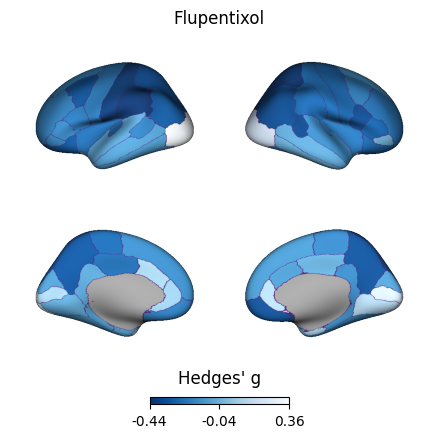

In [15]:
# plot 
surface = fetch_fsaverage(density='164k')
lh, rh = surface['inflated']
dk = {'left': np.array(lh_labels), 'right': np.array(rh_labels)} # outlines 

p = Plot(lh, rh, views=['lateral', 'medial'], zoom=1.2)
p.add_layer(pmap, cmap='Blues_r', cbar_label="Hedges' g")
p.add_layer(dk, as_outline=True, cbar=False)
  
pic = p.build()

# fix legend 
cbar_ax = pic.axes[-1]
cbar_ax.set_ylabel('')
cbar_ax.set_title("Hedges' g", pad=10);
plt.title('Flupentixol')
pic.savefig(os.path.join(base_path + '/figs/FLU_parcelwise_hedges_g.jpg'), dpi=300, transparent=True)
